In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as st
import scipy.stats as stats

In [2]:
df = pd.read_csv('customer_churn_data.csv')
df

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,Yes
2,3,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes
3,4,60,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes
4,5,42,Male,32,69.01,Month-to-Month,NaN,2208.32,No,Yes
...,...,...,...,...,...,...,...,...,...,...
995,996,42,Male,41,37.14,Month-to-Month,Fiber Optic,1522.74,Yes,Yes
996,997,62,Male,9,80.93,Month-to-Month,NaN,728.37,No,Yes
997,998,51,Female,15,111.72,Month-to-Month,Fiber Optic,1675.80,Yes,Yes
998,999,39,Male,68,65.67,One-Year,NaN,4465.56,No,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       1000 non-null   int64  
 1   Age              1000 non-null   int64  
 2   Gender           1000 non-null   object 
 3   Tenure           1000 non-null   int64  
 4   MonthlyCharges   1000 non-null   float64
 5   ContractType     1000 non-null   object 
 6   InternetService  703 non-null    object 
 7   TotalCharges     1000 non-null   float64
 8   TechSupport      1000 non-null   object 
 9   Churn            1000 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 78.3+ KB


In [4]:
df.isnull().sum()

CustomerID           0
Age                  0
Gender               0
Tenure               0
MonthlyCharges       0
ContractType         0
InternetService    297
TotalCharges         0
TechSupport          0
Churn                0
dtype: int64

In [5]:
df['InternetService'] = df['InternetService'].fillna(0)

In [6]:
df.isnull().sum()

CustomerID         0
Age                0
Gender             0
Tenure             0
MonthlyCharges     0
ContractType       0
InternetService    0
TotalCharges       0
TechSupport        0
Churn              0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       1000 non-null   int64  
 1   Age              1000 non-null   int64  
 2   Gender           1000 non-null   object 
 3   Tenure           1000 non-null   int64  
 4   MonthlyCharges   1000 non-null   float64
 5   ContractType     1000 non-null   object 
 6   InternetService  1000 non-null   object 
 7   TotalCharges     1000 non-null   float64
 8   TechSupport      1000 non-null   object 
 9   Churn            1000 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 78.3+ KB


In [8]:
df.duplicated().sum()

0

<Axes: ylabel='count'>

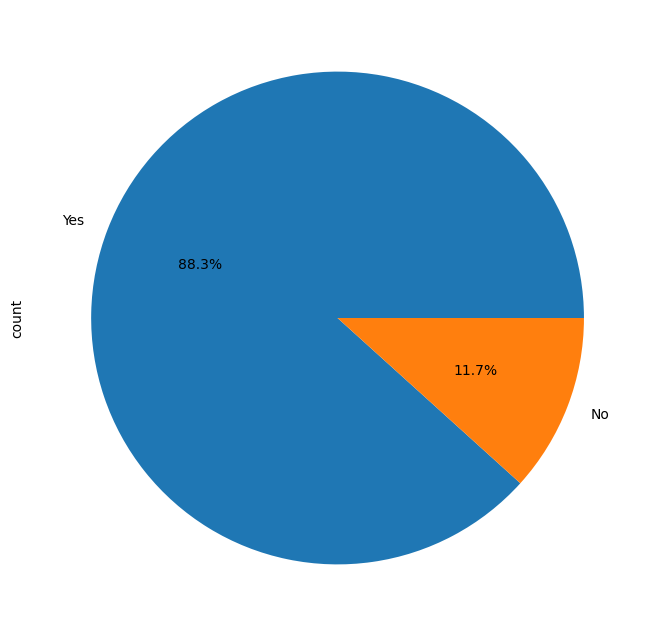

In [9]:
df['Churn'].value_counts().plot(kind='pie',autopct='%.1f%%',figsize=(8,8))

In [10]:
df.describe()

,CustomerID,Age,Tenure,MonthlyCharges,TotalCharges
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,500.500000,44.674000,18.97300,74.391290,1404.364060
std,288.819436,9.797741,18.89257,25.712083,1571.755048
min,1.000000,12.000000,0.00000,30.000000,0.000000
25%,250.750000,38.000000,5.00000,52.357500,345.217500
50%,500.500000,45.000000,13.00000,74.060000,872.870000
75%,750.250000,51.000000,26.00000,96.102500,1900.175000
max,1000.000000,83.000000,122.00000,119.960000,12416.250000


In [11]:
corr = df.select_dtypes(include = ['number'])
corr.corr()

,CustomerID,Age,Tenure,MonthlyCharges,TotalCharges
CustomerID,1.000000,0.036730,-0.018585,-0.030504,-0.027490
Age,0.036730,1.000000,0.000472,0.006362,-0.001896
Tenure,-0.018585,0.000472,1.000000,-0.014552,0.894868
MonthlyCharges,-0.030504,0.006362,-0.014552,1.000000,0.304893
TotalCharges,-0.027490,-0.001896,0.894868,0.304893,1.000000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       1000 non-null   int64  
 1   Age              1000 non-null   int64  
 2   Gender           1000 non-null   object 
 3   Tenure           1000 non-null   int64  
 4   MonthlyCharges   1000 non-null   float64
 5   ContractType     1000 non-null   object 
 6   InternetService  1000 non-null   object 
 7   TotalCharges     1000 non-null   float64
 8   TechSupport      1000 non-null   object 
 9   Churn            1000 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 78.3+ KB


In [13]:
chage = df.groupby('Churn', as_index=False)['Age'].median()
chage

,Churn,Age
0,No,44.0
1,Yes,45.0


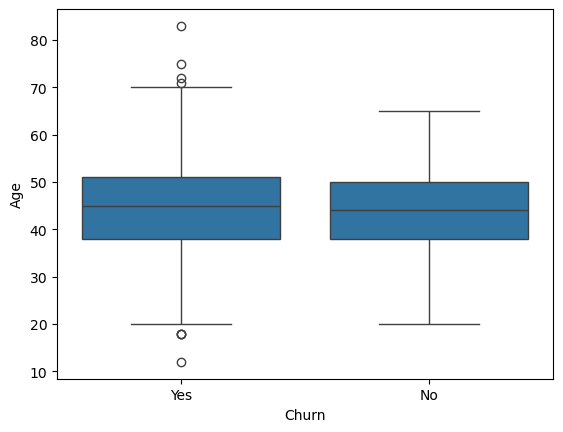

In [14]:
sns.boxplot(x='Churn',
    y='Age',data=df)
plt.show()

In [15]:
stats.levene(df['Age'][df['Churn']=='Yes'],
             df['Age'][df['Churn']=='No'],
             center='mean')

LeveneResult(statistic=0.40869974243391394, pvalue=0.5227769084801432)

In [16]:
stats.ttest_ind(df['Age'][df['Churn']=='Yes'],
             df['Age'][df['Churn']=='No'],
                equal_var=True)

TtestResult(statistic=1.3950097065999087, pvalue=0.16332328402725654, df=998.0)

In [17]:
chgen = pd.crosstab(index=df['Gender'],columns=df['Churn'])
chgen

Churn,No,Yes
Gender,,
Female,68,470
Male,49,413


Text(0, 0.5, 'Churn')

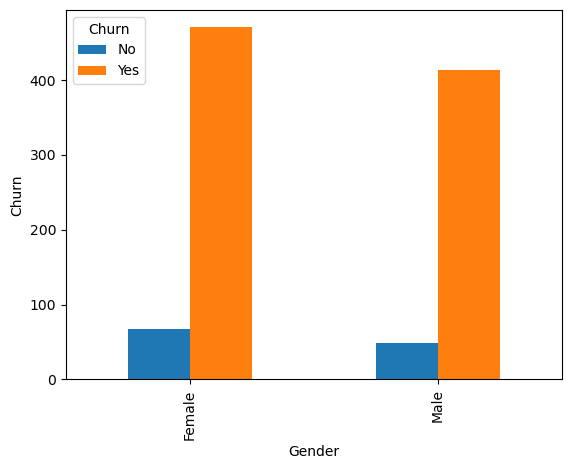

In [18]:
chgen.plot(kind='bar')
plt.xlabel('Gender')
plt.ylabel('Churn')

In [19]:
c, p, dof, expected = stats.chi2_contingency(chgen)
p

0.3688203310595237

In [20]:
df = df.copy()
df['Churn'] = df['Churn'].map({'Yes':1, 'No':0})

numerical_features = ['Age','Tenure','MonthlyCharges','TotalCharges']
categorical_features = ['Gender','ContractType','InternetService','TechSupport']

significant_features = []

# Numerical Feature Selection
for col in numerical_features:
    churn_yes = df[df['Churn']==1][col]
    churn_no  = df[df['Churn']==0][col]
    
    # Levene test (equal variances?)
    levene_p = stats.levene(churn_yes, churn_no).pvalue
    
    # T-test
    ttest_p = stats.ttest_ind(churn_yes, churn_no).pvalue
    
    if ttest_p < 0.05:
        significant_features.append(col)
        print(f"{col}: Significant (p = {ttest_p:.4f})")
    else:
        print(f"{col}: Not significant (p = {ttest_p:.4f})")


# Categorical Feature Selection (Chi-Square)
for col in categorical_features:
    table = pd.crosstab(df[col], df['Churn'])
    chi2, p, dof, expected = stats.chi2_contingency(table)
    
    if p < 0.05:
        significant_features.append(col)
        print(f"{col}: Significant (p = {p:.4f})")
    else:
        print(f"{col}: Not significant (p = {p:.4f})")

print("\nSelected Significant Features:", significant_features)

Age: Not significant (p = 0.1633)
Tenure: Significant (p = 0.0000)
MonthlyCharges: Significant (p = 0.0000)
TotalCharges: Significant (p = 0.0013)
Gender: Not significant (p = 0.3688)
ContractType: Significant (p = 0.0000)
InternetService: Significant (p = 0.0000)
TechSupport: Significant (p = 0.0000)

Selected Significant Features: ['Tenure', 'MonthlyCharges', 'TotalCharges', 'ContractType', 'InternetService', 'TechSupport']


# Assign x n y

In [22]:
x = df[['Tenure', 'MonthlyCharges', 'TotalCharges', 'ContractType', 'InternetService', 'TechSupport']]
y = df[['Churn']]

In [23]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Tenure           1000 non-null   int64  
 1   MonthlyCharges   1000 non-null   float64
 2   TotalCharges     1000 non-null   float64
 3   ContractType     1000 non-null   object 
 4   InternetService  1000 non-null   object 
 5   TechSupport      1000 non-null   object 
dtypes: float64(2), int64(1), object(3)
memory usage: 47.0+ KB


In [24]:
df['TechSupport'].value_counts()

TechSupport
Yes    506
No     494
Name: count, dtype: int64

In [25]:
df['InternetService'].value_counts()

InternetService
Fiber Optic    395
DSL            308
0              297
Name: count, dtype: int64

In [26]:
df['ContractType'].value_counts()

ContractType
Month-to-Month    511
One-Year          289
Two-Year          200
Name: count, dtype: int64

In [27]:
categorical_cols = ['ContractType', 'InternetService', 'TechSupport']

x = pd.get_dummies(x, columns=categorical_cols, drop_first=True)


In [28]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Tenure                       1000 non-null   int64  
 1   MonthlyCharges               1000 non-null   float64
 2   TotalCharges                 1000 non-null   float64
 3   ContractType_One-Year        1000 non-null   bool   
 4   ContractType_Two-Year        1000 non-null   bool   
 5   InternetService_DSL          1000 non-null   bool   
 6   InternetService_Fiber Optic  1000 non-null   bool   
 7   TechSupport_Yes              1000 non-null   bool   
dtypes: bool(5), float64(2), int64(1)
memory usage: 28.4 KB


In [29]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

In [30]:
x

,Tenure,MonthlyCharges,TotalCharges,ContractType_One-Year,ContractType_Two-Year,InternetService_DSL,InternetService_Fiber Optic,TechSupport_Yes
0,4,88.35,353.40,False,False,False,True,True
1,0,36.67,0.00,False,False,False,True,True
2,2,63.79,127.58,False,False,False,True,False
3,8,102.34,818.72,True,False,True,False,True
4,32,69.01,2208.32,False,False,False,False,False
...,...,...,...,...,...,...,...,...
995,41,37.14,1522.74,False,False,False,True,True
996,9,80.93,728.37,False,False,False,False,False
997,15,111.72,1675.80,False,False,False,True,True
998,68,65.67,4465.56,True,False,False,False,False


In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)

In [32]:
x_test = scaler.fit_transform(x_test)

In [33]:
x_train

array([[-0.93742582, -1.1865962 , -0.84888887, ..., -0.64686916,
        -0.81013252, -1.02275892],
       [-0.83144961, -1.27075781, -0.79799097, ..., -0.64686916,
        -0.81013252, -1.02275892],
       [ 2.2948486 ,  0.92477927,  3.00496034, ..., -0.64686916,
         1.23436595,  0.97774752],
       ...,
       [-0.19559234,  0.92284896,  0.06213225, ...,  1.54590766,
        -0.81013252,  0.97774752],
       [ 2.18887239, -0.65962097,  1.30127815, ...,  1.54590766,
        -0.81013252,  0.97774752],
       [-0.24858045, -0.32490484, -0.29049276, ...,  1.54590766,
        -0.81013252,  0.97774752]])

In [34]:
x_test

array([[-1.01138927,  0.19761193, -0.91612129, ..., -0.75      ,
         1.25064086, -0.97043679],
       [-0.79958   , -1.52890938, -0.8445026 , ..., -0.75      ,
        -0.79959006, -0.97043679],
       [-0.00529523, -0.1135752 , -0.04130702, ..., -0.75      ,
         1.25064086,  1.03046381],
       ...,
       [-0.79958   ,  0.54769746, -0.6849036 , ...,  1.33333333,
        -0.79959006,  1.03046381],
       [ 0.47127563, -1.87210665, -0.40854354, ...,  1.33333333,
        -0.79959006,  1.03046381],
       [ 1.5832743 ,  1.5124586 ,  2.59723031, ..., -0.75      ,
        -0.79959006, -0.97043679]])

In [35]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, y_train)

C:\Users\zuhairi\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [36]:
y_pred = lr.predict(x_test)
y_pred

array([1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

In [37]:
from sklearn.metrics import accuracy_score
def modelperformance(predictions):
    print('Accuracy score model is {}'.format(accuracy_score(y_test, predictions)))

In [38]:
modelperformance(y_pred)

Accuracy score model is 0.94


In [39]:
from sklearn.metrics import classification_report
print(classification_report(y_true=y_test,y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.72      0.78      0.75        23
           1       0.97      0.96      0.97       177

    accuracy                           0.94       200
   macro avg       0.85      0.87      0.86       200
weighted avg       0.94      0.94      0.94       200



In [104]:
from sklearn.model_selection import GridSearchCV

In [106]:
from sklearn.neighbors import KNeighborsClassifier

In [108]:
param_grid = {
    "n_neighbors" : [3,5,7,9],
    "weights" : ["uniform", "distance"],
}

In [110]:
gridkn = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)

In [112]:
gridkn.fit(x_train,y_train.values.ravel())

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9],
                         'weights': ['uniform', 'distance']})

In [114]:
gridkn.best_params_

{'n_neighbors': 3, 'weights': 'uniform'}

In [116]:
y_pred = gridkn.predict(x_test)
y_pred

array([1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1], dtype=int64)

In [118]:
modelperformance(y_pred)

Accuracy score model is 0.96


In [120]:
from sklearn.svm import SVC

In [122]:
svm = SVC()

In [124]:
param_grid = {
    "C" : [0.01,0.1,0.5,1],
    "kernel" : ["linear", "rbf", "poly"],
}

In [126]:
gridsvc = GridSearchCV(svm, param_grid, cv=5)

In [136]:
gridsvc.fit(x_train, y_train.values.ravel())

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 0.5, 1],
                         'kernel': ['linear', 'rbf', 'poly']})

In [138]:
gridsvc.best_params_

{'C': 1, 'kernel': 'rbf'}

In [142]:
y_pred = gridsvc.predict(x_test)
y_pred

array([1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

In [144]:
modelperformance(y_pred)

Accuracy score model is 0.965


In [148]:
from sklearn.tree import DecisionTreeClassifier

In [150]:
param_grid = {
    "criterion" : ["gini", "entropy"],
    "splitter" : ["best", "random"],
    "max_depth" : ["None", 10,20,30],
    "min_samples_split" : [2,5,10],
    "min_samples_leaf" : [1,2,4]
}

In [152]:
gridtree = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)

In [154]:
gridtree.fit(x_train, y_train.values.ravel())

C:\Users\zuhairi\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
180 fits failed out of a total of 720.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
180 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\zuhairi\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\zuhairi\anaconda3\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\zuhairi\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\zuhairi\anaconda3\Lib\s

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': ['None', 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [156]:
gridtree.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'splitter': 'best'}

In [158]:
y_pred = gridtree.predict(x_test)

In [160]:
modelperformance(y_pred)

Accuracy score model is 0.995


In [166]:
best_model = gridtree.best_estimator_

In [168]:
import joblib
joblib.dump(best_model, "model.pkl")

['model.pkl']

In [170]:
joblib.dump(scaler, 'Scaler.pkl')

['Scaler.pkl']

In [172]:
x

,Tenure,MonthlyCharges,TotalCharges,ContractType_One-Year,ContractType_Two-Year,InternetService_DSL,InternetService_Fiber Optic,TechSupport_Yes
0,4,88.35,353.40,False,False,False,True,True
1,0,36.67,0.00,False,False,False,True,True
2,2,63.79,127.58,False,False,False,True,False
3,8,102.34,818.72,True,False,True,False,True
4,32,69.01,2208.32,False,False,False,False,False
...,...,...,...,...,...,...,...,...
995,41,37.14,1522.74,False,False,False,True,True
996,9,80.93,728.37,False,False,False,False,False
997,15,111.72,1675.80,False,False,False,True,True
998,68,65.67,4465.56,True,False,False,False,False


In [176]:
x.describe()

,Tenure,MonthlyCharges,TotalCharges
count,1000.00000,1000.000000,1000.000000
mean,18.97300,74.391290,1404.364060
std,18.89257,25.712083,1571.755048
min,0.00000,30.000000,0.000000
25%,5.00000,52.357500,345.217500
50%,13.00000,74.060000,872.870000
75%,26.00000,96.102500,1900.175000
max,122.00000,119.960000,12416.250000
